In [42]:
import json
from urllib.request import urlopen
from PIL import Image, ImageDraw
import pandas as pd
import sqlite3
import numpy as np
import glob

In [43]:
# frame types for PASEF mode
FRAME_TYPE_MS1 = 0
FRAME_TYPE_MS2 = 8

In [44]:
annotations_file_name = '/Users/darylwilding-mcbride/Downloads/via_export_json_aw.json'
with open(annotations_file_name) as annotations_file:
    annotations = json.load(annotations_file)

In [45]:
annotation = annotations['http://spectra-server-lb-1653892276.ap-southeast-2.elb.amazonaws.com/tile/33/frame/1944-1']

In [46]:
frame_id = 1944
tile_idx = 33

In [47]:
PIXELS_X = 910
PIXELS_Y = 910  # equal to the number of scan lines
PIXELS_PER_BIN = 1
MZ_MIN = 100.0
MZ_MAX = 1700.0
SCAN_MAX = PIXELS_Y
SCAN_MIN = 1
MZ_PER_TILE = 18.0
MZ_BIN_WIDTH = MZ_PER_TILE / (PIXELS_X * PIXELS_PER_BIN)
TILES_PER_FRAME = int((MZ_MAX - MZ_MIN) / MZ_PER_TILE)

In [48]:
mz_bins = np.arange(start=MZ_MIN, stop=MZ_MAX+MZ_BIN_WIDTH, step=MZ_BIN_WIDTH)  # go slightly wider to accommodate the maximum value

In [49]:
# load the tile
tile_url = annotation['filename']
tile_url

'http://spectra-server-lb-1653892276.ap-southeast-2.elb.amazonaws.com/tile/33/frame/1944'

In [50]:
img = Image.open(urlopen(tile_url))

In [51]:
img_mq_labels = Image.open('/Users/darylwilding-mcbride/Downloads/frame-1944-tile-33-mq-labels.png')
draw_mq_labels = ImageDraw.Draw(img_mq_labels)

In [52]:
# overlay bounding boxes on the image
regions = annotation['regions']

In [53]:
draw = ImageDraw.Draw(img)
for region in regions:
    shape = region['shape_attributes']
    x = shape['x']
    y = shape['y']
    width = shape['width']
    height = shape['height']
    # draw AW labels on a blank tile
    draw.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline='green')
    # draw AW labels (in green) over the MQ labels (in red)
    draw_mq_labels.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline='green')
    

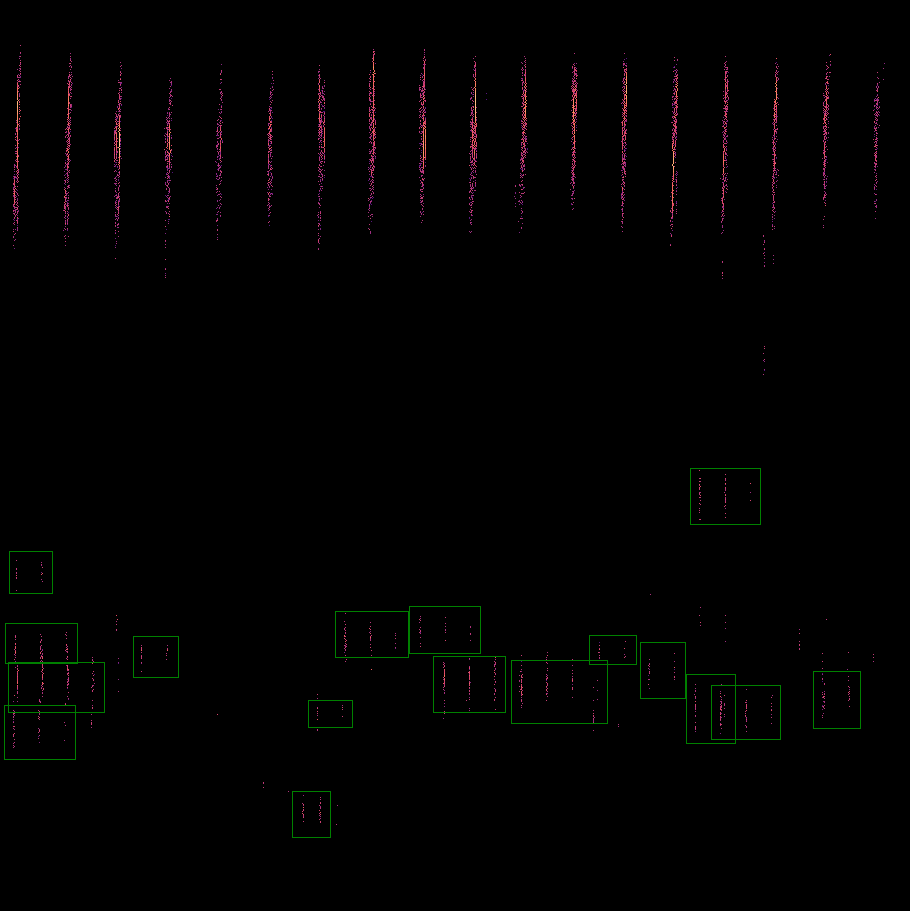

In [54]:
img

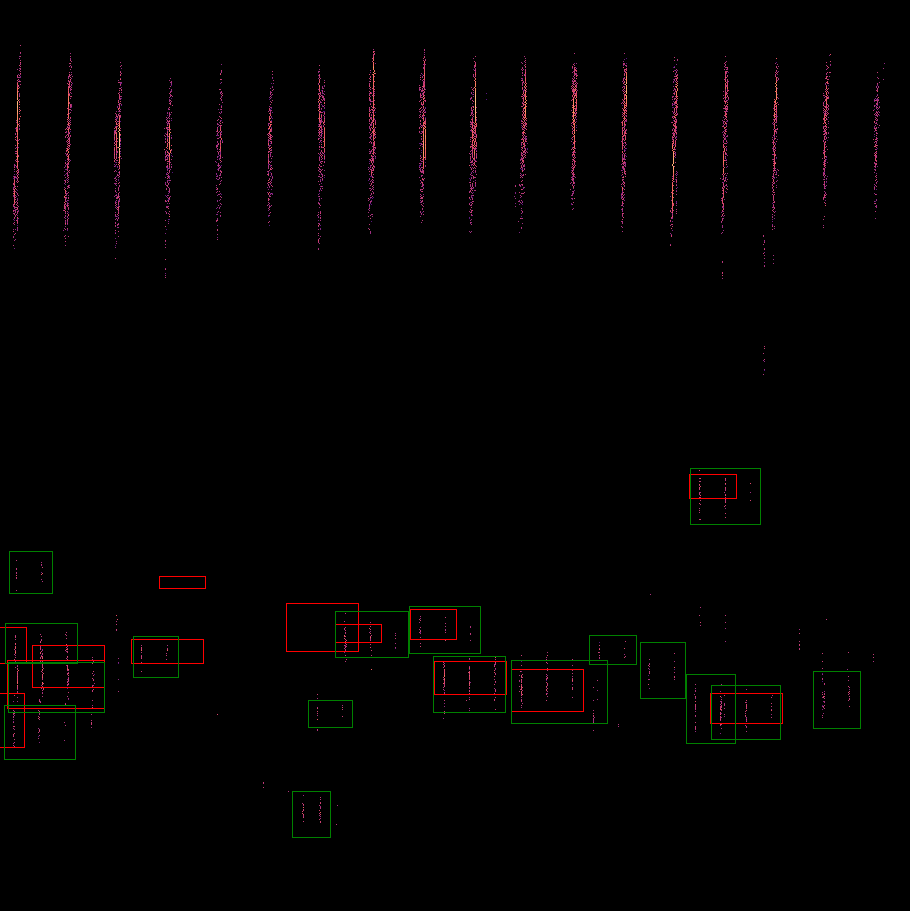

In [55]:
img_mq_labels

What does PASEF make of the same frame? This is an ms1 frame, so we need to find all the ms2 frames for it. The isolation windows in those frames should be a fair comparison.

In [21]:
db_conn = sqlite3.connect('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/raw-databases/190719_Hela_Ecoli_1to1_01_Slot1-1_1_1926.d/analysis.tdf')
isolation_window_df = pd.read_sql_query("select * from PasefFrameMsMsInfo order by Frame", db_conn)
frames_properties_df = pd.read_sql_query("select * from Frames order by Id ASC;", db_conn)
db_conn.close()

In [22]:
frames_properties_df.columns

Index(['Id', 'Time', 'Polarity', 'ScanMode', 'MsMsType', 'TimsId',
       'MaxIntensity', 'SummedIntensities', 'NumScans', 'NumPeaks',
       'MzCalibration', 'T1', 'T2', 'TimsCalibration', 'PropertyGroup',
       'AccumulationTime', 'RampTime'],
      dtype='object')

In [23]:
frames_properties_df[frames_properties_df.Id == 2019]

,Id,Time,Polarity,ScanMode,MsMsType,TimsId,MaxIntensity,SummedIntensities,NumScans,NumPeaks,MzCalibration,T1,T2,TimsCalibration,PropertyGroup,AccumulationTime,RampTime
2018,2019,214.21922,+,8,0,70116352,13861,19159275,910,124875,1,26.040922,29.711071,1,1,99.99,99.99


In [24]:
frames_properties_df.loc[2018:2030]

,Id,Time,Polarity,ScanMode,MsMsType,TimsId,MaxIntensity,SummedIntensities,NumScans,NumPeaks,MzCalibration,T1,T2,TimsCalibration,PropertyGroup,AccumulationTime,RampTime
2018,2019,214.219220,+,8,0,70116352,13861,19159275,910,124875,1,26.040922,29.711071,1,1,99.99,99.99
2019,2020,214.323806,+,8,8,70026240,697,293485,910,3900,1,26.040922,29.711071,1,1,99.99,99.99
2020,2021,214.430136,+,8,8,70040064,5906,1049219,910,9074,1,26.040922,29.711071,1,1,99.99,99.99
2021,2022,214.536100,+,8,8,70069248,3096,1080992,910,9796,1,26.040922,29.711071,1,1,99.99,99.99
2022,2023,214.642586,+,8,8,70099968,1153,368086,910,4659,1,26.040922,29.711071,1,1,99.99,99.99
2023,2024,214.747206,+,8,0,70497280,12931,19353228,910,122411,1,26.040922,29.711071,1,1,99.99,99.99
2024,2025,214.852710,+,8,8,70408192,1717,368763,910,4075,1,26.040922,29.711071,1,1,99.99,99.99
2025,2026,214.958042,+,8,8,70422528,7364,1476942,910,11897,1,26.040922,29.711071,1,1,99.99,99.99
2026,2027,215.063874,+,8,8,70458880,8990,1425411,910,9508,1,26.040922,29.711071,1,1,99.99,99.99
2027,2028,215.170387,+,8,8,70487040,699,215987,910,2748,1,26.040922,29.710720,1,1,99.99,99.99


In [25]:
frames_properties_df[frames_properties_df.Id == 1944].Time

1943    206.296694
Name: Time, dtype: float64

In [121]:
# find the next ms1 frame
next_ms1_frame_id = frames_properties_df[(frames_properties_df.MsMsType == FRAME_TYPE_MS1) & (frames_properties_df.Id > frame_id)].Id.min()
next_ms1_frame_id

2024

In [122]:
# find the ms2 frame ids for the selected frame
ms2_frame_ids = frames_properties_df[(frames_properties_df.MsMsType == FRAME_TYPE_MS2) & (frames_properties_df.Id > frame_id) & (frames_properties_df.Id < next_ms1_frame_id)].Id.tolist()
ms2_frame_ids

[2020, 2021, 2022, 2023]

In [123]:
isolation_window_df.columns

Index(['Frame', 'ScanNumBegin', 'ScanNumEnd', 'IsolationMz', 'IsolationWidth',
       'CollisionEnergy', 'Precursor'],
      dtype='object')

In [124]:
# find the isolation windows for these frames
isolation_windows = isolation_window_df[isolation_window_df.Frame.isin(ms2_frame_ids)]

In [125]:
len(isolation_windows)

47

In [126]:
len(isolation_windows.Precursor.unique())

39

In [127]:
mz_lower = MZ_MIN + (tile_idx * MZ_PER_TILE)
mz_upper = mz_lower + MZ_PER_TILE
mz_lower,mz_upper

(694.0, 712.0)

In [128]:
for precursor,group_df in isolation_windows.groupby('Precursor'):
    fragmentation_event = group_df.iloc[0]
    isolation_mz = fragmentation_event.IsolationMz
    mz_array_idx = int(np.digitize(isolation_mz, mz_bins))-1
    tile_idx_base = tile_idx * PIXELS_X
    if (isolation_mz >= mz_lower) and (isolation_mz <= mz_upper):
        x = mz_array_idx - tile_idx_base
        y = fragmentation_event.ScanNumBegin
        width = fragmentation_event.IsolationWidth
        height = fragmentation_event.ScanNumEnd - fragmentation_event.ScanNumBegin
        print("({},{}), ({},{})".format(x,y,width,height))
        draw.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline='green')

(672,647.0), (2.0730388236779196,25.0)
(672,673.0), (2.0730420757717525,25.0)


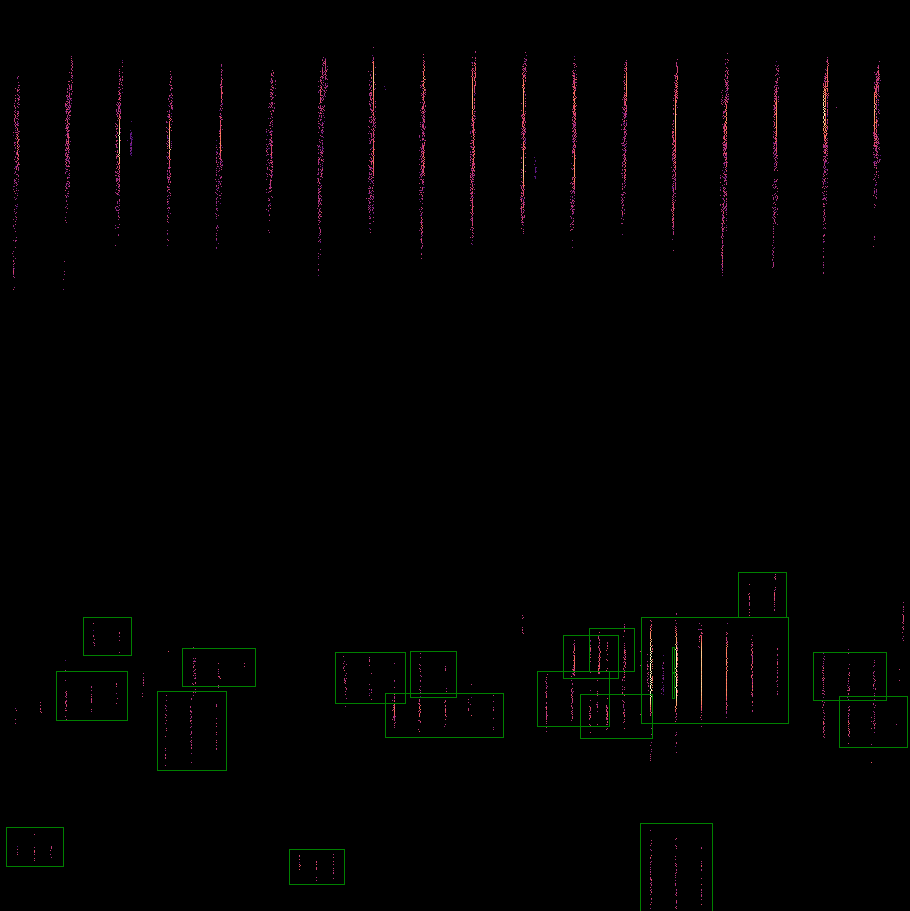

In [129]:
img

In [130]:
# get the precursors for these isolation windows
precursor_ids = isolation_windows.Precursor.unique().tolist()
precursor_ids

[3585,
 3586,
 3611,
 3612,
 3613,
 3614,
 3615,
 3601,
 3616,
 3617,
 3609,
 3610,
 3618,
 3619,
 3620,
 3621,
 3622,
 3623,
 3624,
 3625,
 3626,
 3627,
 3628,
 3629,
 3630,
 3631,
 3632,
 3633,
 3634,
 3635,
 3636,
 3637,
 3638,
 3639,
 3640,
 3641,
 3642,
 3643,
 3644]

In [131]:
# load the features detected for these precursors
df_l = []
for precursor_id in precursor_ids:
    df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/features/190719_Hela_Ecoli_1to1_01/exp-dwm-test-run-190719_Hela_Ecoli_1to1_01-features-precursor-{}.pkl'.format(precursor_id))
    df_l.append(df)
# make a single df from the list of dfs
features_df = pd.concat(df_l, axis=0, sort=False)
del df_l[:]   

In [132]:
len(features_df)

65

In [133]:
features_df.columns

Index(['candidate_phr_error', 'charge', 'envelope', 'feature_id', 'intensity',
       'intensity_full_rt_extent', 'mono_adjusted', 'monoisotopic_mz',
       'original_phr', 'original_phr_error', 'precursor_id', 'rt_apex',
       'rt_curve_fit', 'rt_lower', 'rt_upper', 'scan_apex', 'scan_curve_fit',
       'scan_lower', 'scan_upper', 'monoisotopic_mass'],
      dtype='object')

In [134]:
# what are all the features that overlap with this frame?
retention_time_secs = frames_properties_df[frames_properties_df.Id == 2019].iloc[0].Time
retention_time_secs

214.21922012711772

In [135]:
features_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/features/190719_Hela_Ecoli_1to1_01/exp-dwm-test-run-190719_Hela_Ecoli_1to1_01-features-all.pkl')

In [136]:
features_df[['rt_lower','rt_apex','rt_upper']].head()

,rt_lower,rt_apex,rt_upper
0,1059.91,1063.62,1067.34
0,1002.55,1028.87,1055.20
1,1022.36,1027.04,1042.36
2,1003.81,1031.07,1058.32
0,1011.49,1017.02,1022.56


In [137]:
# find the rt limits with two standard deviations rather than three
features_df['rt_lower_2sd'] = features_df.rt_apex - ((features_df.rt_apex - features_df.rt_lower) / 3 * 2)
features_df['rt_upper_2sd'] = features_df.rt_apex + ((features_df.rt_upper - features_df.rt_apex) / 3 * 2)

In [138]:
# find the rt limits with one standard deviation rather than three
features_df['rt_lower_1sd'] = features_df.rt_apex - ((features_df.rt_apex - features_df.rt_lower) / 3 * 1)
features_df['rt_upper_1sd'] = features_df.rt_apex + ((features_df.rt_upper - features_df.rt_apex) / 3 * 1)

In [139]:
subset_features_df = features_df[(retention_time_secs >= features_df.rt_lower_2sd) & (retention_time_secs <= features_df.rt_upper_2sd)].copy()

In [140]:
len(subset_features_df)

816

In [141]:
subset_features_df['mz_lower'] = subset_features_df.apply(lambda row: min(row.envelope[0][0], row.monoisotopic_mz), axis=1)
subset_features_df['mz_upper'] = subset_features_df.apply(lambda row: row.envelope[-1][0], axis=1)

In [142]:
subset_features_df[['mz_lower','mz_upper']].head()

,mz_lower,mz_upper
0,586.780057,587.781956
0,777.837411,779.339126
1,779.239815,780.738524
2,579.766143,580.768932
0,569.261173,570.273788


In [143]:
mz_lower,mz_upper

(694.0, 712.0)

In [144]:
features_in_frame_df = subset_features_df[(subset_features_df.mz_lower >= mz_lower) & (subset_features_df.mz_upper <= mz_upper)]

In [145]:
isotope_gap_pixels = 10

In [146]:
for idx,feature in features_in_frame_df.iterrows():
    feature_mz_lower_idx = int(np.digitize(feature.mz_lower, mz_bins))-1
    feature_mz_upper_idx = int(np.digitize(feature.mz_upper, mz_bins))-1
    tile_idx_base = tile_idx * PIXELS_X
    # draw the rectangle in tile coordinates
    x = feature_mz_lower_idx - tile_idx_base - isotope_gap_pixels
    y = feature.scan_lower
    width = feature_mz_upper_idx - feature_mz_lower_idx + (2 * isotope_gap_pixels)
    height = feature.scan_upper - feature.scan_lower
    draw.rectangle(xy=[(x, y), (x+width, y+height)], fill=None, outline='green')

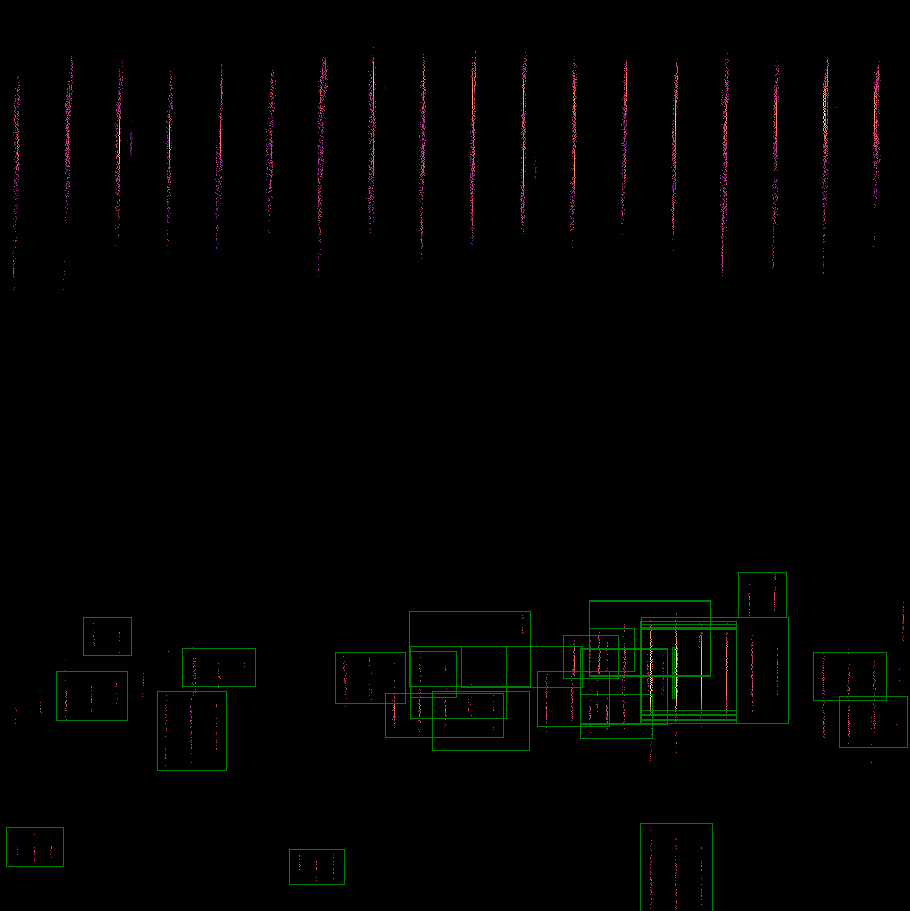

In [147]:
img